In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

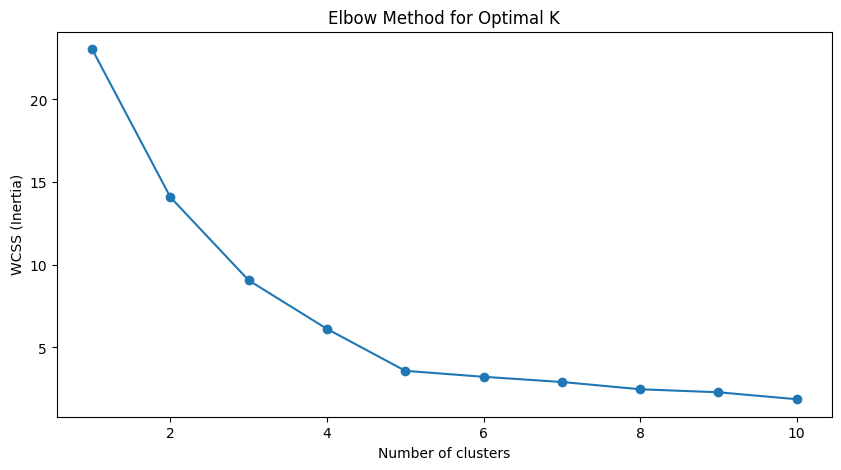

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [62]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


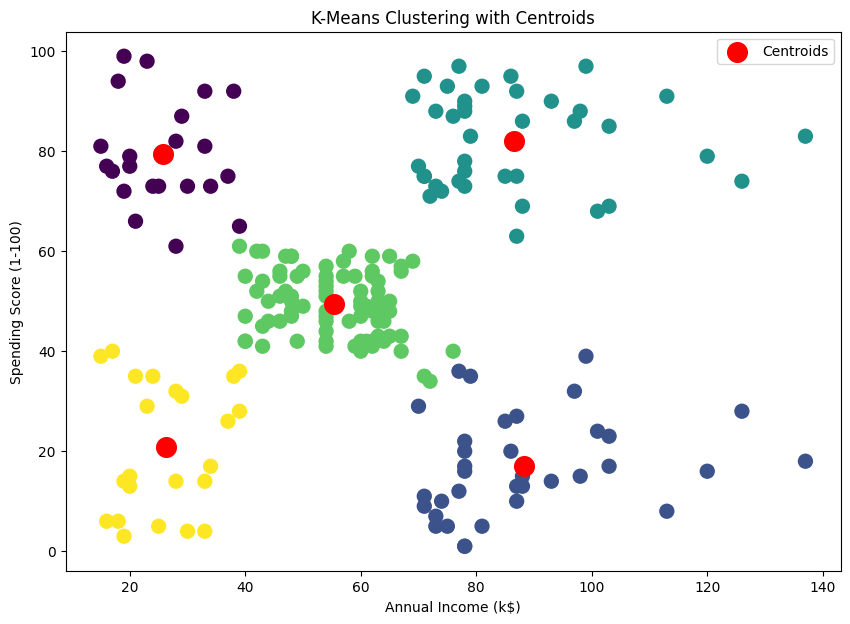

In [63]:
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids)

plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=100)
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

In [64]:
# Menghitung Silhouette Score

silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


In [65]:
# Mengelompokkan data berdasarkan Cluster dan menampilkan statistik Spending Score
group = df.groupby('Cluster')[["CustomerID","Spending Score (1-100)"]].agg(list).reset_index()
customerID = group[group["Cluster"] == 0]["CustomerID"]
df_customer = pd.DataFrame(customerID.values[0], columns=["Customer"])
df_customer

,Customer
0,2
1,4
2,6
3,8
4,10
5,12
6,14
7,16
8,18
9,20
